In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import mstats

## Load Data

In [2]:


# 1) Read the current constituents table from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
table = pd.read_html(url, header=0)[0]  # first table on the page

# 2) Extract the tickers
sp500_tickers = table['Symbol'].tolist()

# 3) (Optional) Save to CSV for future use
pd.DataFrame({'Ticker': sp500_tickers}) \
  .to_csv("sp500_tickers.csv", index=False)

print(f"Found {len(sp500_tickers)} symbols.")
print(sp500_tickers)

Found 503 symbols.
['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'COIN', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DH

In [3]:
# 2) Convert any “.”-style tickers to Yahoo’s format (“BRK.B” → “BRK-B”)
yf_tickers = [t.replace('.', '-') for t in sp500_tickers]

# 3) Download
data = yf.download(
    yf_tickers,
    start="2002-01-01",
    end="2025-01-01",
    auto_adjust=True, 
)


[*********************100%***********************]  503 of 503 completed


In [4]:
second_level = data.columns.get_level_values(0).unique()
print(second_level)


Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [5]:
price = data['Close']
volume = data['Volume']

# 3) Compute daily dollar volume
dollar_vol = price * volume

# 4) Take the time-series average dollar volume per ticker forthe last 5 years [2020-2024]
avg_dv = dollar_vol.loc['2020-01-01':'2024-12-31'].mean()


# 5) Sort descending and grab the top 100 tickers
top50 = avg_dv.sort_values(ascending=False).iloc[:50]

# 6) If you just want the ticker list:
top50_tickers = top50.index.tolist()
print("Top 50 most liquid tickers:", top50_tickers)



Top 50 most liquid tickers: ['TSLA', 'NVDA', 'AAPL', 'AMZN', 'MSFT', 'AMD', 'META', 'GOOGL', 'GOOG', 'NFLX', 'BA', 'AVGO', 'V', 'JPM', 'XOM', 'BAC', 'COIN', 'INTC', 'UNH', 'CRM', 'MU', 'PYPL', 'DIS', 'ADBE', 'MRNA', 'BRK-B', 'PLTR', 'LLY', 'MA', 'JNJ', 'SMCI', 'QCOM', 'CVX', 'HD', 'COST', 'WMT', 'UBER', 'PFE', 'WFC', 'C', 'PG', 'CSCO', 'AMAT', 'MRK', 'CRWD', 'ORCL', 'NKE', 'ABNB', 'BKNG', 'GS']


In [6]:
adj_close = data['Close']

monthly_prices = adj_close.resample('M').last()


# want the most 100 liquid tickers
monthly_prices = monthly_prices.loc["2004-01-01":"2024-12-31"][top50_tickers]

monthly_prices

D:\temp\ipykernel_1652\3545121212.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = adj_close.resample('M').last()


Ticker,TSLA,NVDA,AAPL,AMZN,MSFT,AMD,META,GOOGL,GOOG,NFLX,...,PG,CSCO,AMAT,MRK,CRWD,ORCL,NKE,ABNB,BKNG,GS
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-31,NaN,0.170028,0.339011,2.520000,17.099497,14.860000,NaN,NaN,NaN,5.243571,...,28.276604,16.926884,15.787851,21.144041,NaN,11.153840,6.695677,NaN,18.890497,71.998070
2004-02-29,NaN,0.170028,0.359448,2.150500,16.406864,15.000000,NaN,NaN,NaN,4.914286,...,28.676643,15.248013,15.467572,21.357265,NaN,10.357140,7.040748,NaN,22.731798,76.568962
2004-03-31,NaN,0.201740,0.406332,2.164000,15.417379,16.230000,NaN,NaN,NaN,4.874286,...,29.339630,15.517952,15.525808,19.782604,NaN,9.657006,7.494596,NaN,26.622471,75.469643
2004-04-30,NaN,0.156807,0.387398,2.180000,16.159479,14.220000,NaN,NaN,NaN,3.622857,...,29.736322,13.766671,13.298473,21.040560,NaN,9.053441,6.924827,NaN,23.966150,70.145332
2004-05-31,NaN,0.179198,0.421660,2.425000,16.221323,15.550000,NaN,NaN,NaN,4.702857,...,30.306944,14.727900,14.535880,21.174852,NaN,9.174150,6.847828,NaN,25.871986,68.086273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,214.110001,119.340591,228.197845,178.500000,414.712280,148.559998,519.930847,162.592392,164.321136,701.349976,...,168.453705,49.486820,195.788208,115.728607,277.279999,140.123978,81.571075,117.309998,3879.075195,502.723541
2024-09-30,261.630005,121.420464,232.183838,186.330002,427.795685,164.080002,571.470215,165.269501,166.610229,709.270020,...,170.083847,52.110973,200.542480,111.693275,280.470001,168.993774,86.930481,126.809998,4189.321777,487.806885
2024-10-31,249.850006,132.738647,225.118683,186.399994,403.985107,144.070007,566.618469,170.511078,172.091156,756.030029,...,163.161835,54.038525,180.225220,100.638039,296.869995,166.829178,75.847816,134.789993,4650.939453,510.152283


In [7]:
# remove columns with NaN values
monthly_prices = monthly_prices.dropna(axis=1, how='any')
print(monthly_prices.shape)

# save to csv 
# monthly_prices.to_csv("./Data/asset_monthly_prices.csv")

(252, 34)


## Load Data 2

In [8]:
monthly_prices = pd.read_csv("./Data/asset_monthly_prices.csv").set_index('Date')

## Factor Investing

In [9]:
from Functions.Factors import MomentumFactor

In [10]:
mf = MomentumFactor(
    prices=monthly_prices.loc["2010-01-01":"2024-12-31"],)

In [11]:
def backtest_decile_long_short(
    prices: pd.DataFrame,
    signal: pd.DataFrame,
    plot: bool = True
) -> dict:
    """
    Backtest a long-short decile strategy based on provided cross-sectional signal.

    Parameters
    ----------
    prices : pd.DataFrame
        Monthly price data with DateTimeIndex and tickers as columns.
    signal : pd.DataFrame
        Cross-sectional signal DataFrame (T×N) aligned to prices.
    plot : bool
        If True, plot cumulative returns of the strategy.

    Returns
    -------
    dict
        Dictionary containing:
        - 'weights': DataFrame of monthly weights (T×N)
        - 'returns': Series of strategy monthly returns
        - 'benchmark_returns': Series of equal-weight benchmark returns
        - 'metrics': dict with keys 'sharpe', 'annual_return', 'annual_vol', 'turnover',
                     'return_10y', 'return_5y', 'return_1y', 'max_drawdown'
    """
    # 1) Rank signals, highest -> rank 1
    ranks = signal.rank(axis=1, ascending=False)

    # 2) Determine decile size
    N = ranks.shape[1]
    decile_k = N // 10

    # 3) Compute thresholds for top/bottom decile
    threshold_high = ranks.apply(lambda row: row.nsmallest(decile_k).max(), axis=1)
    threshold_low  = ranks.apply(lambda row: row.nlargest(decile_k).min(), axis=1)

    # 4) Build masks
    long_mask  = ranks.le(threshold_high, axis=0)
    short_mask = ranks.ge(threshold_low, axis=0)

    # 5) Equal-weight within masks
    long_w  = long_mask.div ( long_mask.sum(axis=1),  axis=0 )
    short_w = short_mask.div( short_mask.sum(axis=1), axis=0 )
    weights = long_w - short_w

    # 6) Forward returns aligned
    rets = prices.pct_change().shift(-1).reindex(weights.index)

    # 7) Strategy returns
    strat_ret = (weights * rets).sum(axis=1).dropna()

    # 8) Turnover
    prev_gross = weights.shift(1).abs().sum(axis=1)
    turn = (weights.diff().abs().sum(axis=1) / (2 * prev_gross))
    turnover = turn.mean()

    # 9) Basic stats
    ann_return = strat_ret.mean() * 12
    ann_vol    = strat_ret.std() * np.sqrt(12)
    sharpe     = ann_return / ann_vol if ann_vol != 0 else np.nan

    # 10) Benchmark
    benchmark = rets.mean(axis=1).dropna()

    # 11) Period returns helper
    def period_ret(series, months):
        return (1 + series.iloc[-months:]).prod() - 1 if len(series) >= months else np.nan

    ret_10y = period_ret(strat_ret, 120)
    ret_5y  = period_ret(strat_ret, 60)
    ret_1y  = period_ret(strat_ret, 12)

    # 12) Max drawdown
    wealth = (1 + strat_ret).cumprod()
    # print(wealth)
    peak = wealth.cummax()
    drawdown = (wealth - peak) / peak
    max_dd = drawdown.min()

    # 13) Plot
    if plot:
        cum = wealth
        cum.plot(title="Cumulative Returns: Decile Long-Short Strategy")
        plt.show()

    return {
        'weights': weights,
        'returns': strat_ret,
        'benchmark_returns': benchmark,
        'metrics': {
            'sharpe': sharpe,
            'annual_return': ann_return,
            'annual_vol': ann_vol,
            'turnover': turnover,
            'return_10y': ret_10y,
            'return_5y': ret_5y,
            'return_1y': ret_1y,
            'max_drawdown': max_dd
        }
    }

In [12]:

#help functions

def winsorize_and_standardize(Data, lower_quantile=0.01, upper_quantile=0.99):
   

    # standardize
    sig = (Data.sub(Data.mean(axis=1), axis=0)
                .div(Data.std(axis=1), axis=0))
    
    # winsorize
    sig = sig.apply(lambda row: mstats.winsorize(row, limits=[lower_quantile,1-upper_quantile]), axis=1)
    # reconstruct to a DataFrame
    sig = pd.DataFrame(sig.tolist(), index=Data.index, columns=Data.columns)
    return sig

def rank_ic(rank_sig, rank_ret):
    """
    Calculate the rank IC between signal and returns.
    """
    ic = rank_sig.corrwith(rank_ret, axis=1)
    return ic



IC mean: 0.01915344254195962
IC std: 0.28787068793557696
count    167.000000
mean       0.019153
std        0.287871
min       -0.683422
25%       -0.185180
50%        0.009015
75%        0.247517
max        0.632391
dtype: float64


<Axes: title={'center': 'Monthly Momentum IC (12×1, winsorized & z-scored)'}, xlabel='Date'>

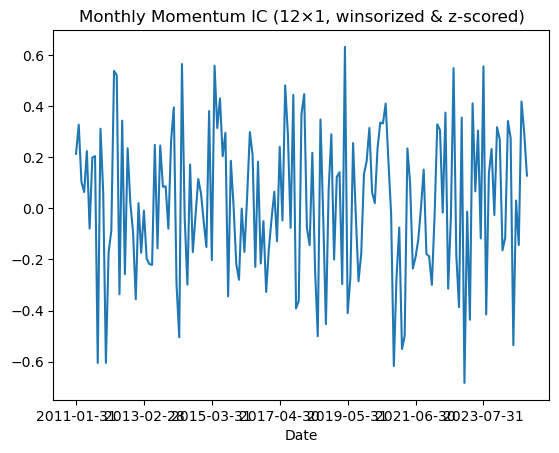

In [13]:
# 1) raw 12×1 momentum
mom_rt = mf.simple_return(lookback=12, skip=1)
# print(mom_rt.head(20))
mom_t = mf.tstat_regression(lookback=12, skip=1)
mom_t = winsorize_and_standardize(mom_t, lower_quantile=0.01, upper_quantile=0.99)
# winsorize and standardize
mom_rt = winsorize_and_standardize(mom_rt, lower_quantile=0.01, upper_quantile=0.99)
# print(mom_rt.head(20))

combined_signal = (mom_rt + mom_t)/2  # combine the two signals
rank_sig = combined_signal.rank(axis=1).dropna(axis = 0)      # each row: 1,2,…,N → 1st, 2nd, …largest
ret = monthly_prices.pct_change().shift(-1)
# print(ret.head(20))
rank_ret = ret.rank(axis=1).dropna(axis=0)  # each row: 1,2,…,N → 1st, 2nd, …largest

rank_ret = rank_ret.reindex(rank_sig.index)
# print(rank_sig.head(), rank_ret.head())


# rank IC
ic_ts = rank_ic(rank_sig, rank_ret)
print("IC mean:", ic_ts.mean())
print("IC std:",  ic_ts.std())
print(ic_ts.describe())

# 7) (Optional) plot the IC series
ic_ts.plot(title="Monthly Momentum IC (12×1, winsorized & z-scored)")





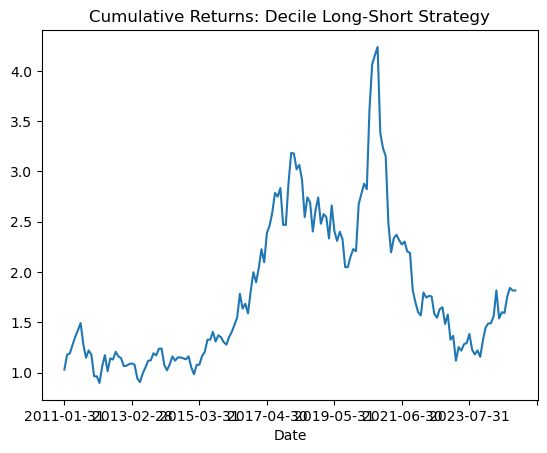

Strategy Metrics:
sharpe: 0.2925
annual_return: 0.0840
annual_vol: 0.2872
turnover: 0.2505
return_10y: 0.7257
return_5y: -0.1846
return_1y: 0.3762
max_drawdown: -0.7361


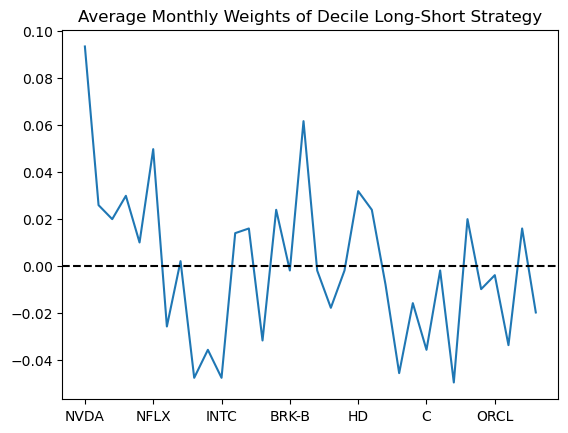

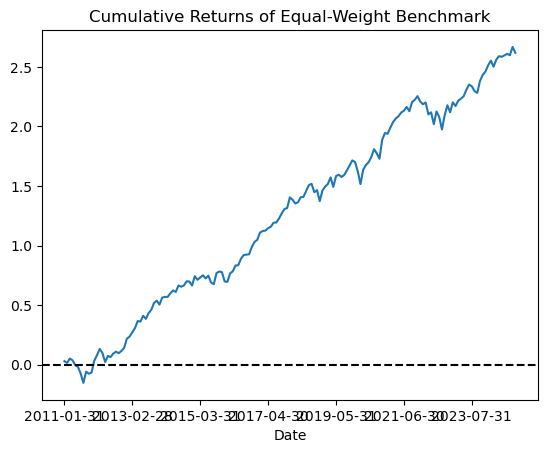

In [14]:
results = backtest_decile_long_short(
    prices=monthly_prices, signal=rank_sig, plot=True)

print("Strategy Metrics:")
for key, value in results['metrics'].items():
    print(f"{key}: {value:.4f}")   
# 8) Plot the weights
results['weights'].mean(axis=0).plot(
    title="Average Monthly Weights of Decile Long-Short Strategy")
plt.axhline(0, color='black', linestyle='--')
plt.show()
# 9) Plot the benchmark returns
results['benchmark_returns'].cumsum().plot(
    title="Cumulative Returns of Equal-Weight Benchmark")
plt.axhline(0, color='black', linestyle='--')
plt.show()


IC mean: 0.025619874854828955
IC std: 0.27871142779834096
count    173.000000
mean       0.025620
std        0.278711
min       -0.713980
25%       -0.186249
50%        0.047212
75%        0.235447
max        0.608862
dtype: float64


<Axes: title={'center': 'Monthly Momentum IC (12×1, winsorized & z-scored)'}, xlabel='Date'>

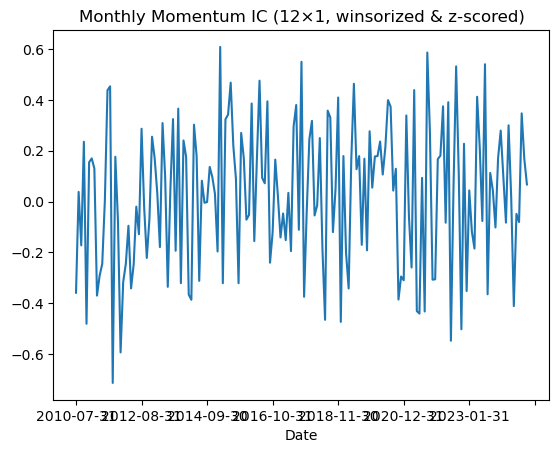

In [15]:

# 1) raw 12×1 momentum
mom_rt = mf.slope_regression(lookback=6, skip=1)
# print(mom_rt.head(20))

# winsorize and standardize
mom_rt = winsorize_and_standardize(mom_rt, lower_quantile=0.01, upper_quantile=0.99)
# print(mom_rt.head(20))
rank_sig = mom_rt.rank(axis=1).dropna(axis = 0)  
# print(rank_sig.head(20))  # each row: 1,2,…,N → 1st, 2nd, …largest
    # each row: 1,2,…,N → 1st, 2nd, …largest
ret = monthly_prices.pct_change().shift(-1)

rank_ret = ret.rank(axis=1).dropna(axis=0)  # each row: 1,2,…,N → 1st, 2nd, …largest
rank_ret = rank_ret.reindex(rank_sig.index)




# rank IC
ic_ts = rank_ic(rank_sig, rank_ret)
print("IC mean:", ic_ts.mean())
print("IC std:",  ic_ts.std())
print(ic_ts.describe())

# 7) (Optional) plot the IC series
ic_ts.plot(title="Monthly Momentum IC (12×1, winsorized & z-scored)")

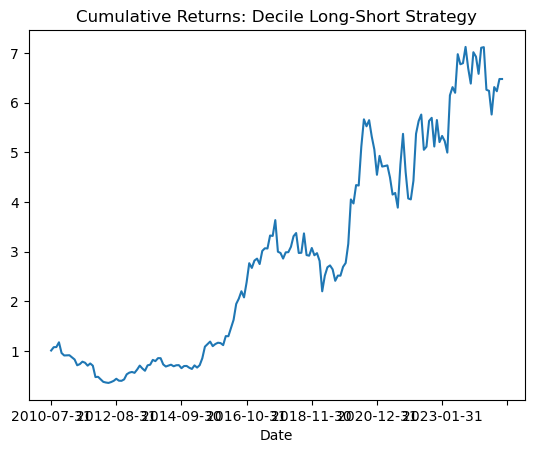

Strategy Metrics:
sharpe: 0.5624
annual_return: 0.1803
annual_vol: 0.3206
turnover: 0.3420
return_10y: 8.8006
return_5y: 1.3374
return_1y: 0.0144
max_drawdown: -0.6974


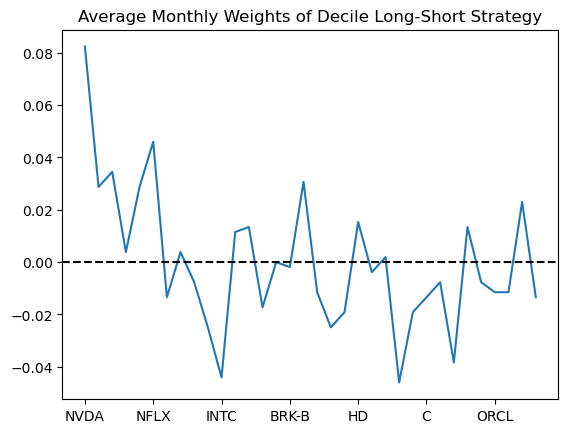

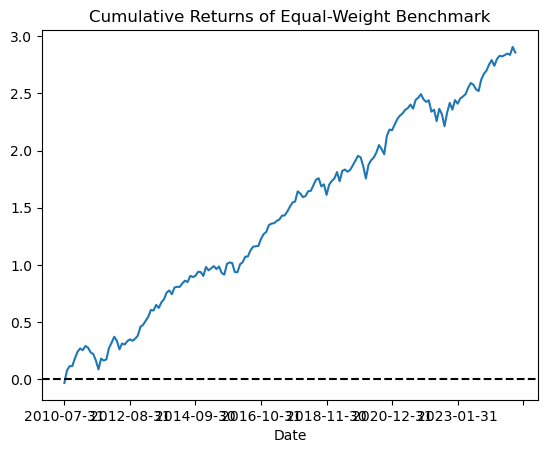

In [16]:
results = backtest_decile_long_short(
    prices=monthly_prices, signal=rank_sig, plot=True)

print("Strategy Metrics:")
for key, value in results['metrics'].items():
    print(f"{key}: {value:.4f}")   
# 8) Plot the weights
results['weights'].mean(axis=0).plot(
    title="Average Monthly Weights of Decile Long-Short Strategy")
plt.axhline(0, color='black', linestyle='--')
plt.show()
# 9) Plot the benchmark returns
results['benchmark_returns'].cumsum().plot(
    title="Cumulative Returns of Equal-Weight Benchmark")
plt.axhline(0, color='black', linestyle='--')
plt.show()

IC mean: 0.03107904162086988
IC std: 0.24232302758129382
count    173.000000
mean       0.031079
std        0.242323
min       -0.540019
25%       -0.130505
50%        0.031297
75%        0.212665
max        0.562722
dtype: float64


<Axes: title={'center': 'Monthly Momentum IC (12×1, winsorized & z-scored)'}, xlabel='Date'>

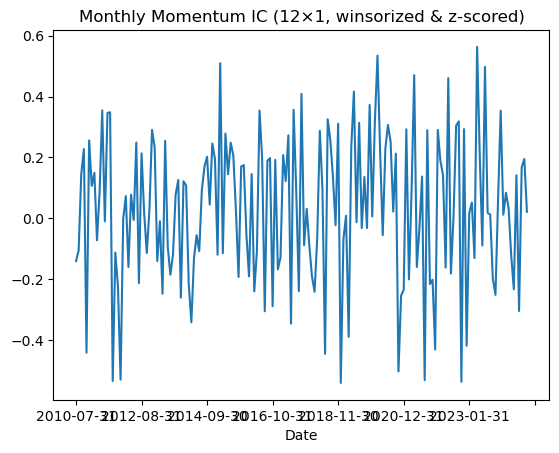

In [17]:

# 1) raw 12×1 momentum
mom_comf_slope = mf.consensus_slope_signal(min_lookback=2, max_lookback=6)
# print(mom_comf_slope.head(20))

# winsorize and standardize
mom_comf_slope = winsorize_and_standardize(mom_comf_slope, lower_quantile=0.01, upper_quantile=0.99)
# print(mom_comf_slope.head(20))
rank_sig = mom_comf_slope.rank(axis=1).dropna(axis = 0)  
# print(rank_sig.head(20))  # each row: 1,2,…,N → 1st, 2nd, …largest
    # each row: 1,2,…,N → 1st, 2nd, …largest
ret = monthly_prices.pct_change().shift(-1)

rank_ret = ret.rank(axis=1).dropna(axis=0)  # each row: 1,2,…,N → 1st, 2nd, …largest
rank_ret = rank_ret.reindex(rank_sig.index)




# rank IC
ic_ts = rank_ic(rank_sig, rank_ret)
print("IC mean:", ic_ts.mean())
print("IC std:",  ic_ts.std())
print(ic_ts.describe())

# 7) (Optional) plot the IC series
ic_ts.plot(title="Monthly Momentum IC (12×1, winsorized & z-scored)")

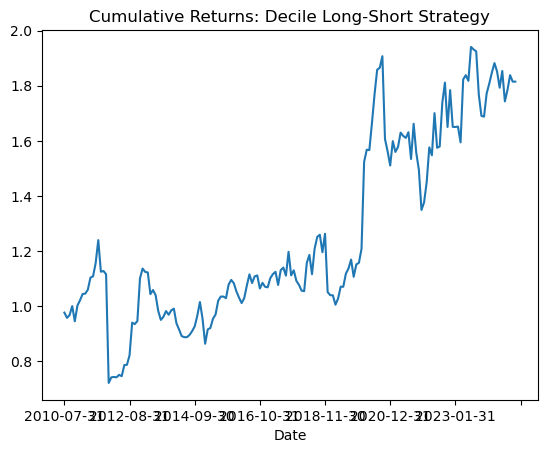

Strategy Metrics:
sharpe: 0.3101
annual_return: 0.0625
annual_vol: 0.2015
turnover: 0.6486
return_10y: 0.9015
return_5y: 0.5683
return_1y: 0.0754
max_drawdown: -0.4182


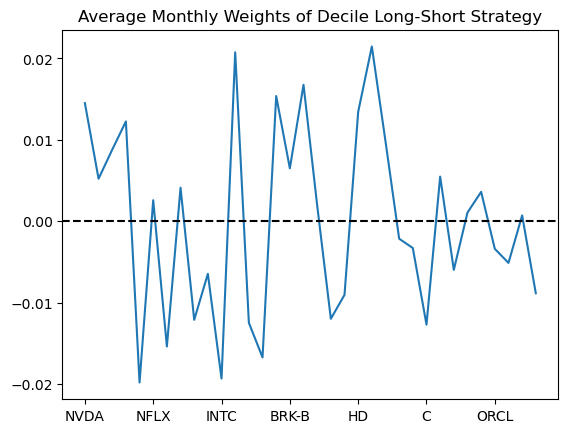

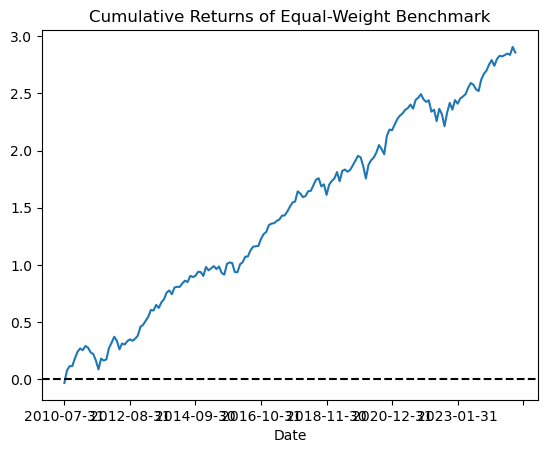

In [ ]:
results = backtest_decile_long_short(
    prices=monthly_prices, signal=rank_sig, plot=True)

print("Strategy Metrics:")
for key, value in results['metrics'].items():
    print(f"{key}: {value:.4f}")   
# 8) Plot the weights
results['weights'].mean(axis=0).plot(
    title="Average Monthly Weights of Decile Long-Short Strategy")
plt.axhline(0, color='black', linestyle='--')
plt.show()
# 9) Plot the benchmark returns
results['benchmark_returns'].cumsum().plot(
    title="Cumulative Returns of Equal-Weight Benchmark")
plt.axhline(0, color='black', linestyle='--')
plt.show()